In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import hdf5storage
import h5py
# For Part C and D
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

In [2]:
with h5py.File('hw4_data1.mat', 'r') as file:
    faces = list(file['faces'])


faces = np.array(faces)
#faces = faces.T
print(np.shape(faces))

(1024, 1000)


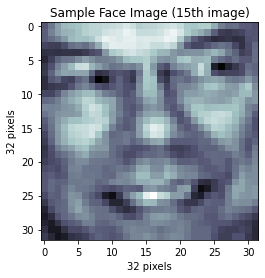

In [3]:
# Part A

# A sample stimuli
figure_num = 0
plt.figure(figure_num)
plt.title('Sample Face Image (15th image)')
plt.xlabel('32 pixels')
plt.ylabel('32 pixels')
plt.imshow(faces[:,15].reshape(32, 32).T, cmap=plt.cm.bone)

plt.show(block=False)

In [4]:
def PCA(data, numberOfPC):
    data = data.T
    data = data - np.mean(data, axis=0)
    covarianceMatrix = np.dot(data.T, data)
    eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)
    eigenvectors = eigenvectors.T    
    indexs = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[indexs]
    eigenvalues_sorted = eigenvalues[indexs]
    
    # store first n eigenvectors
    eigenvectors_f = eigenvectors_sorted[0:numberOfPC]
    
    variance = []
    normalizer = np.sum(eigenvalues)
    for i in range(numberOfPC):
        variance.append(eigenvalues[i] / normalizer)
    result = np.dot(data, eigenvectors_f.T).dot(eigenvectors_f) + np.mean(data, axis=0)
    result = np.array(result)
    result = np.real(result)
    eigenvectors_f = np.real(eigenvectors_f)
    return result, variance, eigenvectors_f

In [5]:
pca_face100, var100, PC100 = PCA(faces, 100)
pca_face25, var25, PC25 = PCA(faces, 25)


In [6]:
print(np.shape(pca_face25))

(1000, 1024)


C:\Users\berka\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


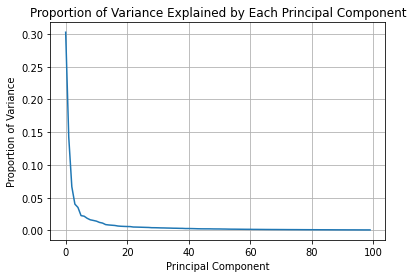

In [7]:
figure_num += 1
plt.figure(figure_num)
plt.plot(var100)
plt.title('Proportion of Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.grid()
plt.show(block=False)

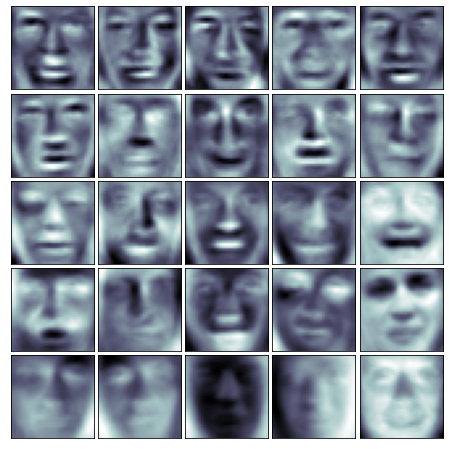

In [8]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(25):
    ax1 = plt.subplot(5,5,-i+25)
    ax1.imshow(PC25[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

In [9]:
# Part B

pca_face10, var10, PC10 = PCA(faces, 10)
pca_face25, var25, PC25 = PCA(faces, 25)
pca_face50, var50, PC50 = PCA(faces, 50)

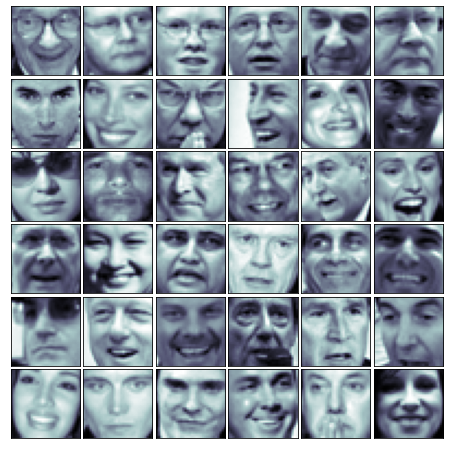

In [10]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(36):
    ax1 = plt.subplot(6,6,i+1)
    ax1.imshow(faces[:,i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

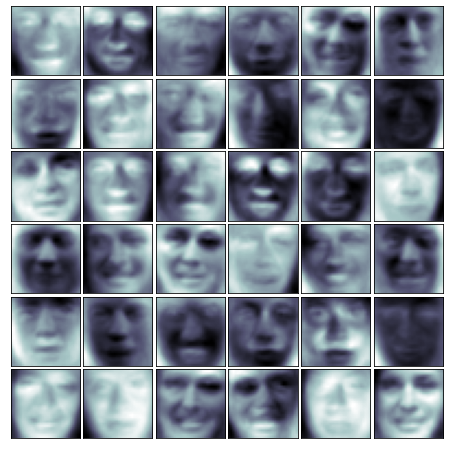

In [11]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(36):
    ax1 = plt.subplot(6,6,i+1)
    ax1.imshow(pca_face10[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)   
plt.show()

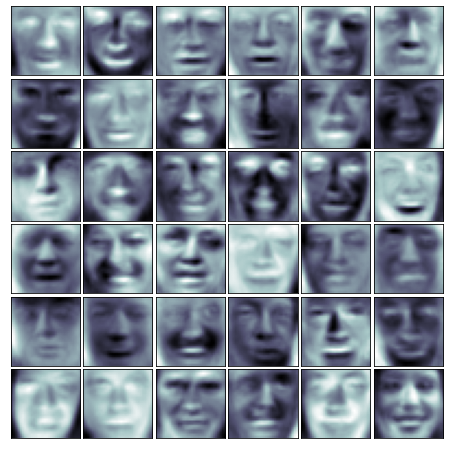

In [12]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(36):
    ax1 = plt.subplot(6,6,i+1)
    ax1.imshow(pca_face25[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

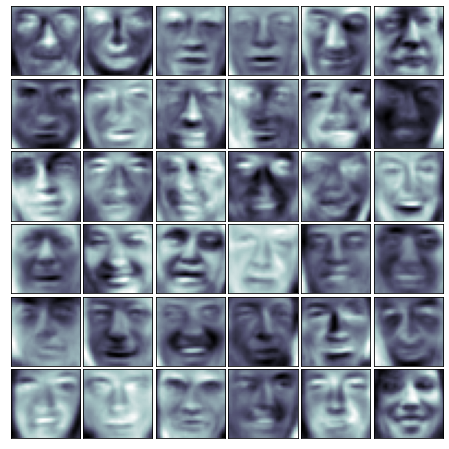

In [13]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(36):
    ax1 = plt.subplot(6,6,i+1)
    ax1.imshow(pca_face50[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

In [14]:
# the mean and standard deviation
MSE_PCA10 = np.mean((pca_face10.T - faces) ** 2)
std_PCA10 = np.std(np.mean((faces.T - pca_face10) ** 2, axis=1))
MSE_PCA25 = np.mean((pca_face25.T - faces) ** 2)
std_PCA25 = np.std(np.mean((faces.T - pca_face25) ** 2, axis=1))
MSE_PCA50 = np.mean((pca_face50.T - faces) ** 2)
std_PCA50 = np.std(np.mean((faces.T - pca_face50) ** 2, axis=1))

In [15]:
print('10 PCs:') 
print('mean of MSEs = %f' % MSE_PCA10)
print('std of MSEs = % f' % std_PCA10)
print('\n')
print('25 PCs:') 
print('mean of MSEs = %f' % MSE_PCA25)
print('std of MSEs = % f' % std_PCA25)
print('\n')
print('50 PCs:') 
print('mean of MSEs = %f' % MSE_PCA50)
print('std of MSEs = % f' % std_PCA50)

10 PCs:
mean of MSEs = 828.361644
std of MSEs =  264.238297


25 PCs:
mean of MSEs = 637.376391
std of MSEs =  156.361695


50 PCs:
mean of MSEs = 503.544966
std of MSEs =  84.950508


In [16]:
# Part C

In [17]:
ica_component10 = FastICA(10) 
ica_component10.fit(faces.T) 
ica_component25 = FastICA(25) 
ica_component25.fit(faces.T)
ica_component50 = FastICA(50) 
ica_component50.fit(faces.T) 

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
        n_components=50, random_state=None, tol=0.0001, w_init=None,
        whiten=True)

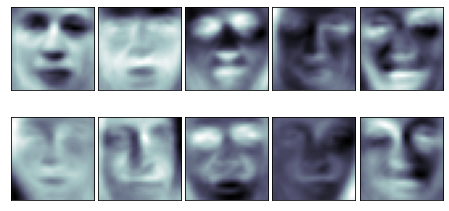

In [18]:
figure_num += 1
plt.figure(figure_num,figsize=(6,3))
for i in range(10):
    ax1 = plt.subplot(2,5,i+1)
    ax1.imshow(ica_component10.components_[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

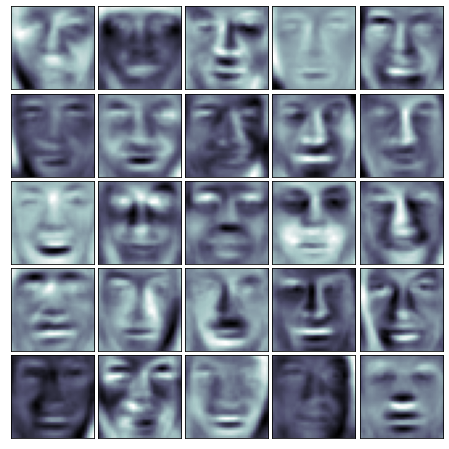

In [19]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(25):
    ax1 = plt.subplot(5,5,i+1)
    ax1.imshow(ica_component25.components_[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

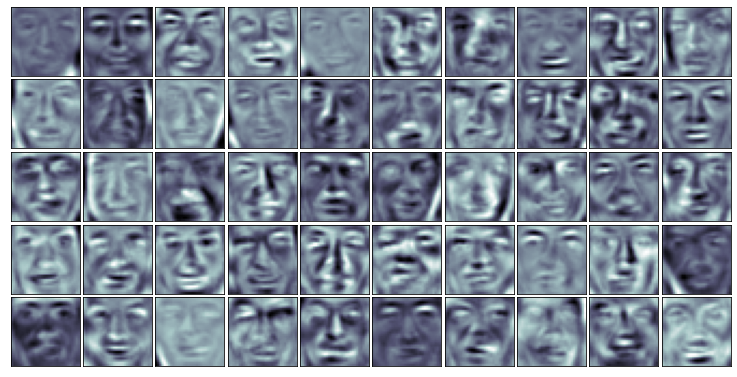

In [20]:
figure_num += 1
plt.figure(figure_num,figsize=(10,5))
for i in range(50):
    ax1 = plt.subplot(5,10,i+1)
    ax1.imshow(ica_component50.components_[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

In [21]:
ica_face10 = ica_component10.fit_transform(faces) .dot(ica_component10.mixing_.T) + ica_component10.mean_
ica_face25 = ica_component25.fit_transform(faces) .dot(ica_component25.mixing_.T) + ica_component25.mean_
ica_face50 = ica_component50.fit_transform(faces) .dot(ica_component50.mixing_.T) + ica_component50.mean_
ica_face10 = ica_face10.T
ica_face25 = ica_face25.T
ica_face50 = ica_face50.T

C:\Users\berka\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


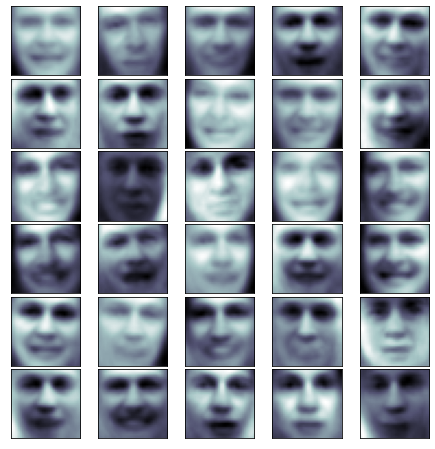

In [22]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(30):
    ax1 = plt.subplot(6,5,i+1)
    ax1.imshow(ica_face10[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

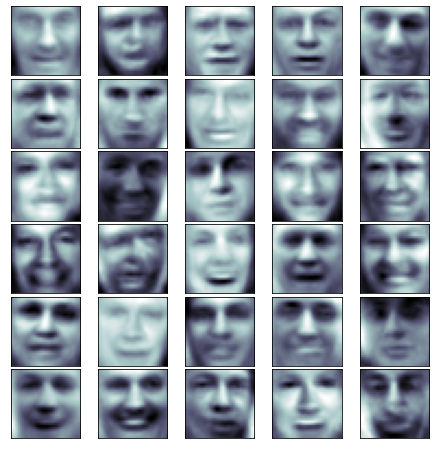

In [23]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(30):
    ax1 = plt.subplot(6,5,i+1)
    ax1.imshow(ica_face25[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

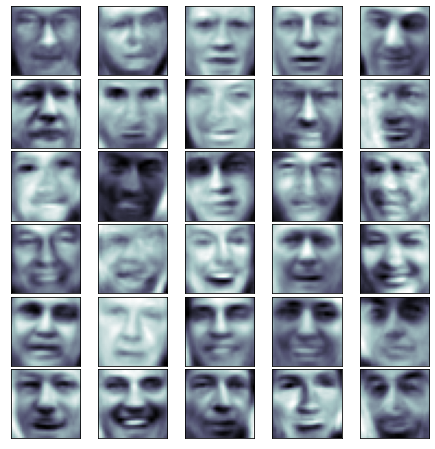

In [24]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(30):
    ax1 = plt.subplot(6,5,i+1)
    ax1.imshow(ica_face50[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

In [25]:
#the mean and standard deviation 
MSE_ICA10 = np.mean((ica_face10.T - faces) ** 2)
std_ICA10 = np.std(np.mean((faces.T - ica_face10) ** 2, axis=1))
MSE_ICA25 = np.mean((ica_face25.T - faces) ** 2)
std_ICA25 = np.std(np.mean((faces.T - ica_face25) ** 2, axis=1))
MSE_ICA50 = np.mean((ica_face50.T - faces) ** 2)
std_ICA50 = np.std(np.mean((faces.T - ica_face50) ** 2, axis=1))

In [26]:
print('10 ICs:') 
print('mean of MSEs = %f' % MSE_ICA10)
print('std of MSEs = % f' % std_ICA10)
print('\n')
print('25 ICs:') 
print('mean of MSEs = %f' % MSE_ICA25)
print('std of MSEs = % f' % std_ICA25)
print('\n')
print('50 ICs:') 
print('mean of MSEs = %f' % MSE_ICA50)
print('std of MSEs = % f' % std_ICA50)

10 ICs:
mean of MSEs = 505.884160
std of MSEs =  246.670797


25 ICs:
mean of MSEs = 326.186755
std of MSEs =  150.232516


50 ICs:
mean of MSEs = 195.499545
std of MSEs =  82.737542


In [27]:
# Part D

nmf_10 = NMF(10, solver="mu")
nmf_component10 = nmf_10.fit_transform(faces.T + np.abs(np.min(faces.T))) 

nmf_25 = NMF(25, solver="mu")
nmf_component25 = nmf_25.fit_transform(faces.T + np.abs(np.min(faces.T))) 

nmf_50 = NMF(50, solver="mu")
nmf_component50 = nmf_50.fit_transform(faces.T + np.abs(np.min(faces.T))) 


C:\Users\berka\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


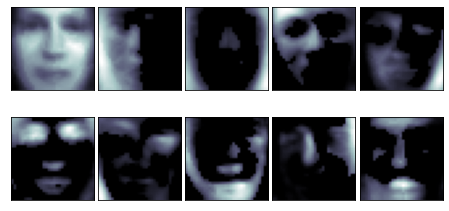

In [28]:
figure_num += 1
plt.figure(figure_num,figsize=(6,3))
for i in range(10):
    ax1 = plt.subplot(2,5,i+1)
    ax1.imshow(nmf_10.components_[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

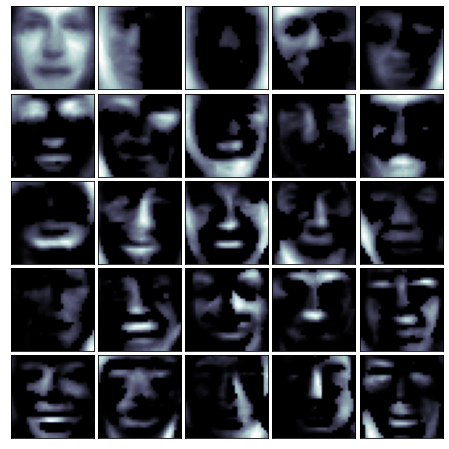

In [29]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(25):
    ax1 = plt.subplot(5,5,i+1)
    ax1.imshow(nmf_25.components_[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

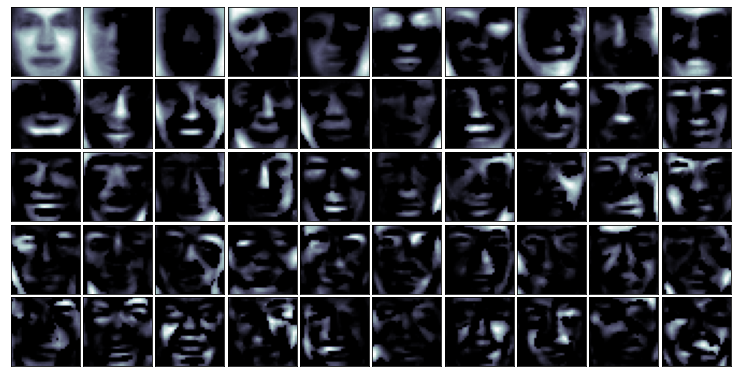

In [30]:
figure_num += 1
plt.figure(figure_num,figsize=(10,5))
for i in range(50):
    ax1 = plt.subplot(5,10,i+1)
    ax1.imshow(nmf_50.components_[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

In [31]:
nmf_face10 = nmf_component10.dot(nmf_10.components_) - np.abs(np.min(faces.T))
nmf_face25 = nmf_component25.dot(nmf_25.components_) - np.abs(np.min(faces.T))
nmf_face50 = nmf_component50.dot(nmf_50.components_) - np.abs(np.min(faces.T))
# nmf_face10 = nmf_face10.T 
# nmf_face25 = nmf_face25.T 
# nmf_face50 = nmf_face50.T 

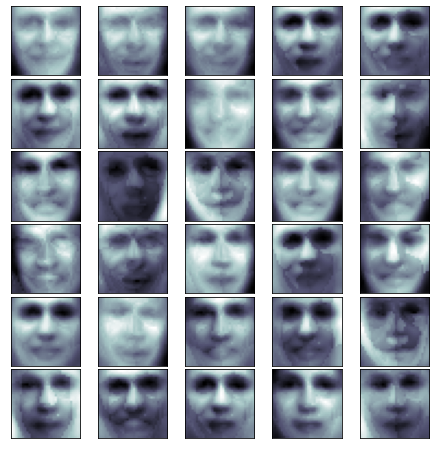

In [32]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(30):
    ax1 = plt.subplot(6,5,i+1)
    ax1.imshow(nmf_face10[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

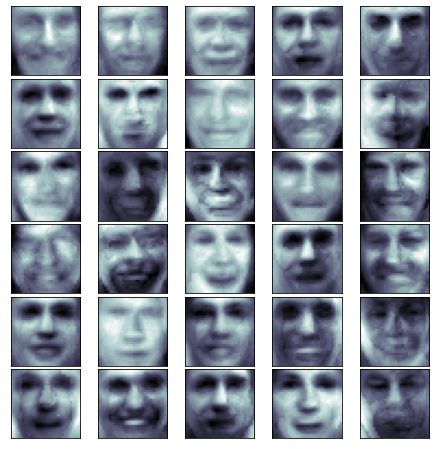

In [33]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(30):
    ax1 = plt.subplot(6,5,i+1)
    ax1.imshow(nmf_face25[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

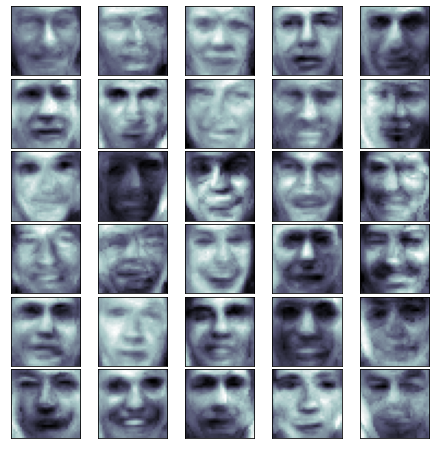

In [34]:
figure_num += 1
plt.figure(figure_num,figsize=(6,6))
for i in range(30):
    ax1 = plt.subplot(6,5,i+1)
    ax1.imshow(nmf_face50[i].reshape(32,32).T, cmap=plt.cm.bone)
    ax1.set_yticks([])
    ax1.set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)
plt.show()

In [35]:
# the mean and standard deviation 
MSE_NMF10 = np.mean((nmf_face10.T - faces) ** 2)
std_NMF10 = np.std(np.mean((faces.T - nmf_face10) ** 2, axis=1))
MSE_NMF25 = np.mean((nmf_face25.T - faces) ** 2)
std_NMF25 = np.std(np.mean((faces.T - nmf_face25) ** 2, axis=1))
MSE_NMF50 = np.mean((nmf_face50.T - faces) ** 2)
std_NMF50 = np.std(np.mean((faces.T - nmf_face50) ** 2, axis=1))

In [36]:
print('10 MFs:') 
print('mean of MSEs = %f' % MSE_NMF10)
print('std of MSEs = % f' % std_NMF10)
print('\n')
print('25 MFs:') 
print('mean of MSEs = %f' % MSE_NMF25)
print('std of MSEs = % f' % std_NMF25)
print('\n')
print('50 MFs:') 
print('mean of MSEs = %f' % MSE_NMF50)
print('std of MSEs = % f' % std_NMF50)

10 MFs:
mean of MSEs = 711.188531
std of MSEs =  373.313124


25 MFs:
mean of MSEs = 549.708700
std of MSEs =  278.251658


50 MFs:
mean of MSEs = 424.913776
std of MSEs =  209.641784
